Three toy 2D datasets are provided (or they can be obtained easily with scikit learn) circles; blobs, and moons. 

Run your own implementation of DBSCAN on these, in two phases.

In [11]:
# load the data:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
df_circles = pd.read_csv('circle.csv')
df_blobs = pd.read_csv('blobs.csv')
df_moons = pd.read_csv('moons.csv')

In [12]:
# Execute, point by point, the DBSCAN algorithm

# 1. Compute distances, get neighbors:

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def get_neighbors(df, point, epsilon):
    neighbors = []
    for i in range(len(df)):
        if euclidean_distance(df.iloc[i], point) < epsilon:
            neighbors.append(i)
    return neighbors

def dbscan(df, epsilon, min_points):
    labels = [0] * len(df)
    c = 0
    for i in tqdm(range(len(df))):
        if labels[i] != 0:
            continue
        neighbors = get_neighbors(df, df.iloc[i], epsilon)
        if len(neighbors) < min_points:
            labels[i] = -1
            continue
        c += 1
        labels[i] = c
        for j in neighbors:
            if labels[j] == -1:
                labels[j] = c
            if labels[j] != 0:
                continue
            labels[j] = c
            new_neighbors = get_neighbors(df, df.iloc[j], epsilon)
            if len(new_neighbors) >= min_points:
                neighbors.extend(new_neighbors)
    return labels


In [6]:
# Circles dataset:
epsilon = 0.2
min_points = 3
labels = dbscan(df_circles, epsilon, min_points)

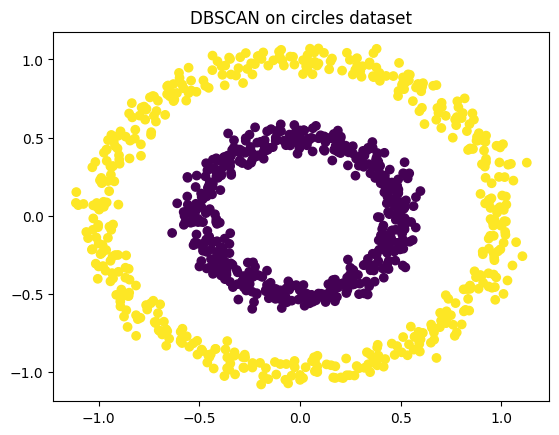

0.11343226571477871


In [10]:
# plot the results:
plt.scatter(df_circles.iloc[:, 0], df_circles.iloc[:, 1], c=labels)
plt.title('DBSCAN on circles dataset')
plt.show()
# silhouette score:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_circles, labels))


In [13]:
# blobs dataset:
epsilon = 0.2
min_points = 3
labels = dbscan(df_blobs, epsilon, min_points)


  0%|          | 0/1500 [01:23<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# plot the results:

In [14]:
# moons dataset:
epsilon = 0.2
min_points = 3
labels = dbscan(df_moons, epsilon, min_points)

  0%|          | 2/1500 [02:30<31:22:21, 75.39s/it] 


KeyboardInterrupt: 

In [ ]:
# plot